# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
! pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#np.random.seed(1234)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#cities
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
#### TEST
# List for holding temperature
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city = 'london'

response = requests.get(query_url + city).json()
#temp = (response['main']['temp'])

#print(f"The temperature information received is: {temp}")

pprint(response)

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1595302828,
 'id': 2643743,
 'main': {'feels_like': 11.05,
          'humidity': 66,
          'pressure': 1025,
          'temp': 12.58,
          'temp_max': 13,
          'temp_min': 12.22},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1595304531,
         'sunset': 1595361880,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 1}}


In [46]:
# List for holding temperature
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

name = []
lat = []
lon = []
temp = []
hum = []
clo = []
wind = []
temp_max = []
temp_min = []
country = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        clo.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        country.append(response['sys']['country'])
        print(f"{city} found!")
        print()
    except:
        # Append null values
        print(f"{city} Not found")
        pass        


kaitangata found!

kodiak found!

mataura found!

gravdal found!

acajutla found!

butaritari found!

ushuaia found!

samusu Not found
port alfred found!

grand river south east Not found
rikitea found!

margate found!

sao filipe found!

bjornevatn found!

warwick found!

mitchell found!

bengkulu found!

vilyuysk found!

cape town found!

pevek found!

ribeira grande found!

saint anthony found!

husavik found!

hualmay found!

kerouane found!

ponta do sol found!

elliot lake found!

tokzar Not found
carlsbad found!

moussoro found!

andros town found!

hithadhoo found!

acamixtla found!

san vicente found!

hilo found!

bairiki found!

tashla found!

lanzhou found!

avarua found!

atambua found!

airai found!

jamestown found!

bredasdorp found!

chuy found!

saskylakh found!

porto novo found!

thompson found!

poum found!

vaini found!

quinchia found!

kamenskoye Not found
severo-kurilsk found!

khatanga found!

belushya guba Not found
cockburn town found!

albany found!

mys sh

nouadhibou found!

doba found!

sao joao do piaui found!

pisco found!

villarrica found!

delray beach found!

tautira found!

ninghai found!

port hedland found!

mbandaka found!

martapura found!

sokone found!

priyutovo found!

strezhevoy found!

la ronge found!

bagdarin found!

pitimbu found!

axim found!

turukhansk found!

amderma Not found
nemuro found!

kosonsoy found!

aripuana found!

faanui found!

vanimo found!

natal found!

arshan found!

fare found!

caiaponia found!

oxapampa found!

junction city found!

ankazobe found!

morrisburg found!

guamuchil found!

joshimath found!

ludvika found!

pacifica found!

acari found!

leningradskiy found!

lhuntshi Not found
kwidzyn found!

acapulco found!

maningrida found!

hambantota found!

yatou found!

perth found!

homer found!

tongliao found!

itarema found!

tete found!

tisul found!

abu zabad found!

wenling found!

vila velha found!

kazalinsk Not found
iglesias found!

santa fe found!

saint-francois found!

athens 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": name,
    "country": country,
    "temp": temp,
    "latitude": lat,
    "longitude": lon,
    "humidity": hum,
    "wind speed": wind,
    "cloudiness": clo,
    "temp max": temp_max,
    "temp min": temp_min
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,country,temp,latitude,longitude,humidity,wind speed,cloudiness,temp max,temp min
0,Kaitangata,NZ,54.00,-46.28,169.85,59,3.00,26,54.00,54.00
1,Saint Paul Harbor,US,73.40,57.79,-152.41,46,9.17,40,73.40,73.40
2,Mataura,NZ,50.40,-46.19,168.86,78,3.33,100,50.40,50.40
3,Gravdal,NO,53.38,68.12,13.50,72,2.64,96,53.38,53.38
4,Acajutla,SV,70.00,13.59,-89.83,97,3.22,100,70.00,70.00
...,...,...,...,...,...,...,...,...,...,...
559,Formosa,AR,73.40,-26.18,-58.18,64,9.17,100,73.40,73.40
560,Volkhov,RU,62.01,59.93,32.34,99,1.50,100,62.01,62.01
561,La Serena,CL,50.00,-29.91,-71.25,87,9.17,96,50.00,50.00
562,Moffat,GB,46.00,55.33,-3.45,87,3.74,6,46.00,46.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
#  Get the indices of cities that have humidity over 100%.


In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data[weather_data['humidity'] < 100]

clean_city_data

,city,country,temp,latitude,longitude,humidity,wind speed,cloudiness,temp max,temp min
0,Kaitangata,NZ,54.00,-46.28,169.85,59,3.00,26,54.00,54.00
1,Saint Paul Harbor,US,73.40,57.79,-152.41,46,9.17,40,73.40,73.40
2,Mataura,NZ,50.40,-46.19,168.86,78,3.33,100,50.40,50.40
3,Gravdal,NO,53.38,68.12,13.50,72,2.64,96,53.38,53.38
4,Acajutla,SV,70.00,13.59,-89.83,97,3.22,100,70.00,70.00
...,...,...,...,...,...,...,...,...,...,...
559,Formosa,AR,73.40,-26.18,-58.18,64,9.17,100,73.40,73.40
560,Volkhov,RU,62.01,59.93,32.34,99,1.50,100,62.01,62.01
561,La Serena,CL,50.00,-29.91,-71.25,87,9.17,96,50.00,50.00
562,Moffat,GB,46.00,55.33,-3.45,87,3.74,6,46.00,46.00


In [54]:
# Extract relevant fields from the data frame

city_data = clean_city_data[['city','country','temp','latitude','longitude',
                             'cloudiness','humidity','wind speed']]
# Export the City_Data into a csv
city_data.to_csv("output_data/clean_city_data.csv")

clean_city_data

,city,country,temp,latitude,longitude,humidity,wind speed,cloudiness,temp max,temp min
0,Kaitangata,NZ,54.00,-46.28,169.85,59,3.00,26,54.00,54.00
1,Saint Paul Harbor,US,73.40,57.79,-152.41,46,9.17,40,73.40,73.40
2,Mataura,NZ,50.40,-46.19,168.86,78,3.33,100,50.40,50.40
3,Gravdal,NO,53.38,68.12,13.50,72,2.64,96,53.38,53.38
4,Acajutla,SV,70.00,13.59,-89.83,97,3.22,100,70.00,70.00
...,...,...,...,...,...,...,...,...,...,...
559,Formosa,AR,73.40,-26.18,-58.18,64,9.17,100,73.40,73.40
560,Volkhov,RU,62.01,59.93,32.34,99,1.50,100,62.01,62.01
561,La Serena,CL,50.00,-29.91,-71.25,87,9.17,96,50.00,50.00
562,Moffat,GB,46.00,55.33,-3.45,87,3.74,6,46.00,46.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

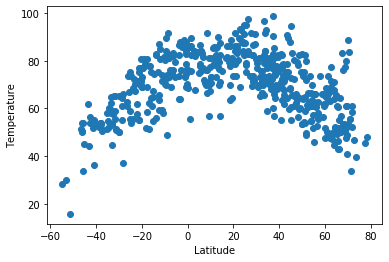

<Figure size 432x288 with 0 Axes>

In [55]:
# Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['latitude']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

plt.savefig('Latitude vs. Temperature Plot.png')

## Latitude vs. Humidity Plot

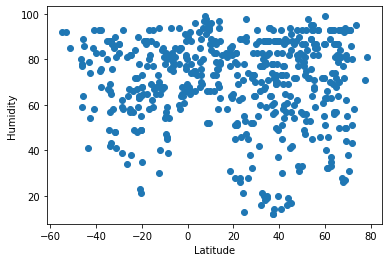

<Figure size 432x288 with 0 Axes>

In [56]:
# Create a Scatter Plot for humidity vs latitude
x_values = clean_city_data['latitude']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

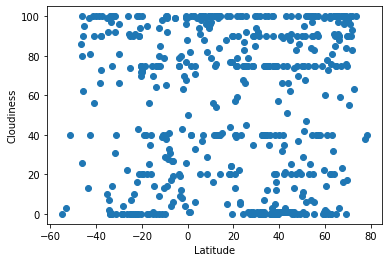

<Figure size 432x288 with 0 Axes>

In [57]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = clean_city_data['latitude']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

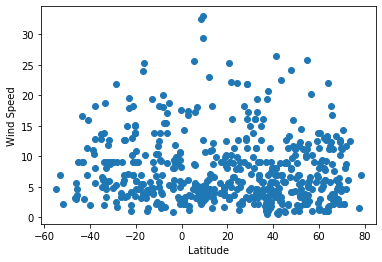

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = clean_city_data['latitude']
y_values = clean_city_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('Latitude vs. Wind Speed.png')

## Linear Regression

In [59]:
# OPTIONAL: Create a function to create Linear Regression plots

In [60]:
# Create Northern and Southern Hemisphere DataFrames
### Leaving Equator out - EK
NH_data = pd.DataFrame(weather_data[weather_data['latitude'] <= 0])
SH_data = pd.DataFrame(weather_data[weather_data['latitude'] > 0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

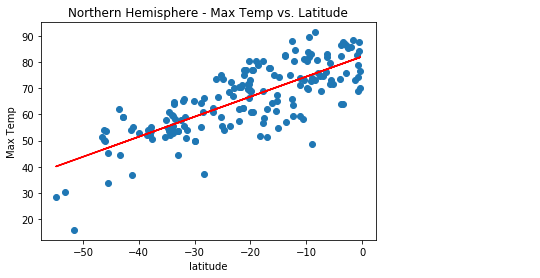

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = NH_data['latitude']
y_values = NH_data['temp max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.show()
plt.savefig('NH - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

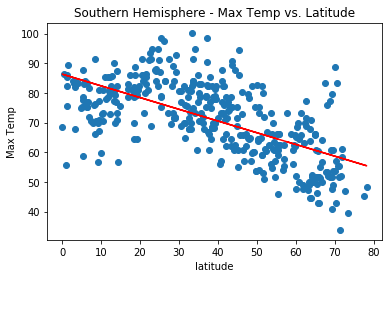

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = SH_data['latitude']
y_values = SH_data['temp max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.show()
plt.savefig('SH - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

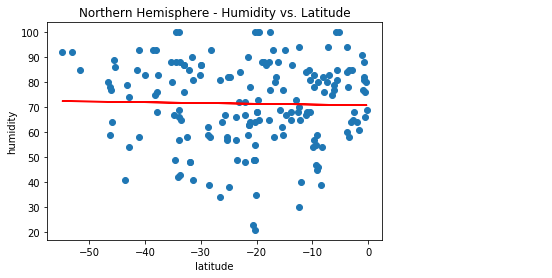

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = NH_data['latitude']
y_values = NH_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.show()
plt.savefig('NH - Max Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

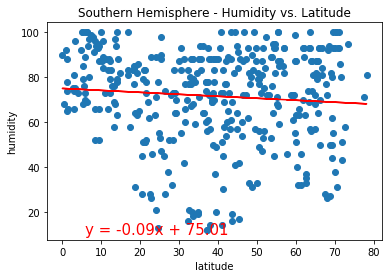

<Figure size 432x288 with 0 Axes>

In [64]:
x_values = SH_data['latitude']
y_values = SH_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.show()
plt.savefig('SH - Humidity vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

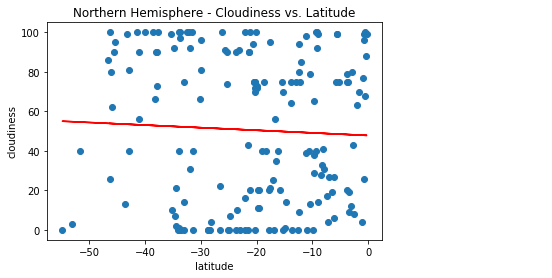

<Figure size 432x288 with 0 Axes>

In [65]:
x_values = NH_data['latitude']
y_values = NH_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.show()
plt.savefig('NH - Cloudiness vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

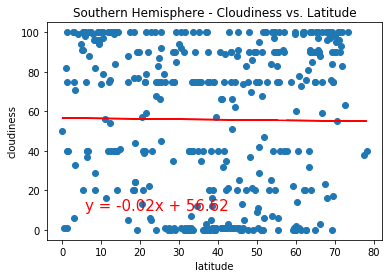

<Figure size 432x288 with 0 Axes>

In [66]:
x_values = SH_data['latitude']
y_values = SH_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.show()
plt.savefig('SH - Cloudiness vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

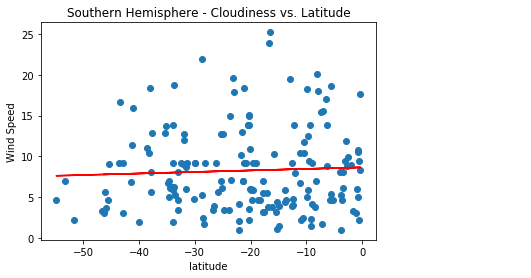

<Figure size 432x288 with 0 Axes>

In [67]:
x_values = NH_data['latitude']
y_values = NH_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.show()
plt.savefig('NH - Wind Speed vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

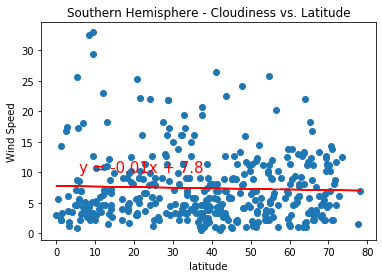

<Figure size 432x288 with 0 Axes>

In [68]:
x_values = SH_data['latitude']
y_values = SH_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.show()
plt.savefig('SH - Wind Speed vs. Latitude Linear Regression.png')